In [1]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import sklearn.model_selection
import matplotlib.pyplot as plt

prefix = "MSFT_2012-06-21_34200000_57600000"
features_data = f"./data/features_{prefix}.csv"
labels_data = f"./data/labels_{prefix}.csv"

feature_df = pd.read_csv(features_data)
feature_df.drop(columns=["orderId"], inplace=True)
labels_df = pd.read_csv(labels_data)

print(f"Features shape: {feature_df.shape}")
print(f"Labels shape: {labels_df.shape}")

display(feature_df.head())
display(labels_df.head())

Features shape: (595800, 349)
Labels shape: (595800, 3)


,direction,bid_ask_qty_comd,bid_ask_qty_diff,type,bid_4_size,ask_1_size,midprice,ask_5_size,bid_5_size,ask_2_size,...,ask_2_size_rolling_mean_5s,ask_2_size_rolling_max_5s,ask_2_size_rolling_min_5s,ask_2_size_rolling_std_5s,size_rolling_mean_1s,size_rolling_std_1s,size_rolling_mean_3s,size_rolling_std_3s,size_rolling_mean_5s,size_rolling_std_5s
0,-1,0.016639,0.359777,3,0.004676,0.017498,0.84186,0.00091,0.0,0.000000,...,0.000000,0.000000,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN
1,-1,0.016639,0.359777,1,0.004676,0.017498,0.84186,0.00091,0.0,0.000457,...,0.002815,0.000457,NaN,0.003773,0.0,0.0,0.0,0.0,0.0,0.0
2,-1,0.016639,0.359777,1,0.004676,0.017498,0.84186,0.00091,0.0,0.000000,...,0.001877,0.000457,NaN,0.002702,0.0,0.0,0.0,0.0,0.0,0.0
3,-1,0.016639,0.359777,1,0.004676,0.017498,0.84186,0.00091,0.0,0.000000,...,0.001408,0.000457,NaN,0.002063,0.0,0.0,0.0,0.0,0.0,0.0
4,-1,0.016639,0.359777,1,0.004676,0.017498,0.84186,0.00091,0.0,0.000000,...,0.001126,0.000457,NaN,0.001628,0.0,0.0,0.0,0.0,0.0,0.0


,1s_change,3s_change,5s_change
0,200.0,200.0,350.0
1,200.0,200.0,350.0
2,200.0,200.0,350.0
3,200.0,200.0,350.0
4,200.0,200.0,350.0


In [2]:
# from itertools import product
# import numpy as np
# from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
    
# tuner = GridSearchCV(
#     estimator=LGBMClassifier(),
#     param_grid=lgbm_paramgrid,
#     scoring="accuracy",
#     cv=TimeSeriesSplit(n_splits=4),
#     verbose=1,
#     n_jobs=-1,
# )
# tuner.fit(feature_df, labels_df['5s_change'])
# best_param = tuner.best_params_
# print("Done tuning")

In [32]:
from lightgbm import LGBMRegressor, plot_importance
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_df, labels_df['5s_change'], test_size=0.2)

prediction_model = LGBMRegressor()
result = prediction_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.337443 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 73338
[LightGBM] [Info] Number of data points in the train set: 476640, number of used features: 328
[LightGBM] [Info] Start training from score -2.204599


In [33]:
import joblib
joblib.dump(prediction_model, 'lgbm.joblib')

['lgbm.joblib']

In [34]:
from lightgbm import LGBMClassifier, plot_importance
from sklearn.model_selection import train_test_split
import joblib

X_train, X_test, y_train, y_test = train_test_split(feature_df, labels_df['5s_change'], test_size=0.2)

print("[+] Loading model...")
lgbm : LGBMClassifier = joblib.load('lgbm.joblib')
predictions = lgbm.predict(X_test)

print(f"R^2 Score: {lgbm.score(X_test, y_test)}")

[+] Loading model...
R^2 Score: 0.781818930885052


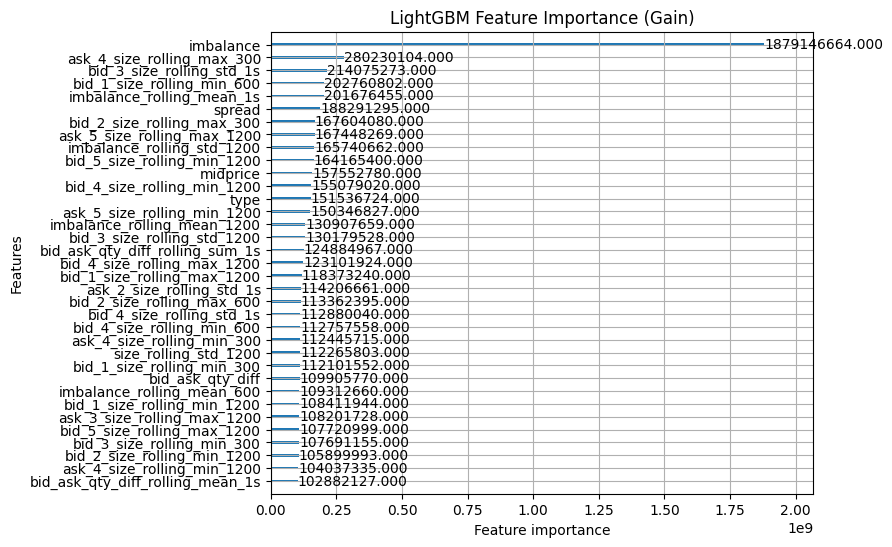

In [35]:
plot_importance(lgbm, importance_type="gain", figsize=(7,6), title="LightGBM Feature Importance (Gain)", max_num_features=35)
plt.show()

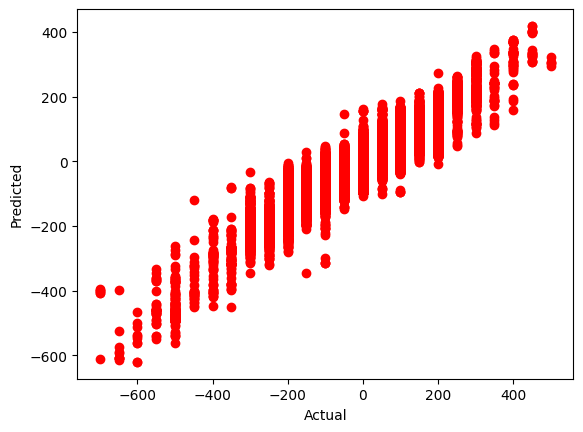

In [60]:
import numpy as np

y_pred = lgbm.predict(X_test)

plt.scatter(y_test, y_pred, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()